In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
os.getcwd()
path = '/home/julien/Documents/Projects/datasets/boston_housing'
os.chdir(path)
print(os.getcwd())

/home/julien/Documents/Projects/datasets/boston_housing


In [15]:
filename = 'housing.csv'
df = pd.read_csv(filename, 
                 delim_whitespace=True,
                 header = None)

In [16]:
from boston_housing.show_NAs import show_NAs

In [18]:
show_NAs(df)

,NAs


### Munging Pipeline

In [10]:
#Checking for missing data
def show_NAs(dataf):
    NAs = pd.concat([dataf.isnull().sum()], axis=1, keys=['NAs'])
    return NAs[NAs.sum(axis=1) > 0]

In [4]:
# Start pipeline
def start_pipeline(dataf):
    dataf = dataf.copy()
    return dataf

# Rename columns
#  - CRIM     per capita crime rate by town
#  - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#  - INDUS    proportion of non-retail business acres per town
#  - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#  - NOX      nitric oxides concentration (parts per 10 million)
#  - RM       average number of rooms per dwelling
#  - AGE      proportion of owner-occupied units built prior to 1940
#  - DIS      weighted distances to five Boston employment centres
#  - RAD      index of accessibility to radial highways
#  - TAX      full-value property-tax rate per $10,000
#  - PTRATIO  pupil-teacher ratio by town
#  - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town = is this black people??!!
#  - LSTAT    % lower status of the population
#  - MEDV     Median value of owner-occupied homes in $1000's
def rename_cols(dataf):
    dataf = dataf.rename(columns={0:'crim',
                                  1: 'res_zone',
                                  2: 'indus',
                                  3: 'river',
                                  4: 'nox',
                                  5: 'rooms',
                                  6: 'age',
                                  7: 'distance',
                                  8: 'highways',
                                  9: 'tax',
                                  10:'pupil_ratio',
                                  11:'blacks',
                                  12:'lstats',
                                  13:'medv'}
                                  
                        )
    return dataf

def by_the_river(dataf):
    river_dict = {0: 'Not_by_river',
                  1: 'By_river'}
    dataf['river'] = dataf['river'].map(river_dict)
    dataf['river'] = pd.Categorical(dataf['river'])
    return dataf

In [6]:
df_clean = (df
.pipe(start_pipeline)
.pipe(rename_cols)
.pipe(by_the_river)
           )

In [8]:
df_clean.sample(2)

,crim,res_zone,indus,river,nox,rooms,age,distance,highways,tax,pupil_ratio,blacks,lstats,medv
447,9.92485,0.0,18.1,Not_by_river,0.740,6.251,96.6,2.1980,24,666.0,20.2,388.52,16.44,12.6
430,8.49213,0.0,18.1,Not_by_river,0.584,6.348,86.1,2.0527,24,666.0,20.2,83.45,17.64,14.5


In [11]:
show_NAs(df_clean)

,NAs


In [86]:
df_clean.corr()

,crim,res_zone,indus,river,nox,rooms,age,distance,highways,tax,pupil_ratio,blacks,lstats,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
res_zone,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
river,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
distance,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
highways,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


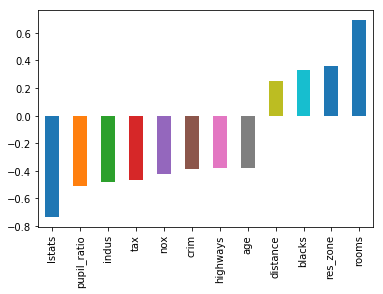

In [12]:
(df_clean
.corr()['medv'].drop(index='medv')
.sort_values()
.plot(kind='bar')
)

In [13]:
corr = df_clean.corr().abs()#.sort_values(by='crim')
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,crim,res_zone,indus,nox,rooms,age,distance,highways,tax,pupil_ratio,blacks,lstats,medv
crim,1,0.200469,0.406583,0.420972,0.219247,0.352734,0.37967,0.625505,0.582764,0.289946,0.385064,0.455621,0.388305
res_zone,0.200469,1,0.533828,0.516604,0.311991,0.569537,0.664408,0.311948,0.314563,0.391679,0.17552,0.412995,0.360445
indus,0.406583,0.533828,1,0.763651,0.391676,0.644779,0.708027,0.595129,0.72076,0.383248,0.356977,0.6038,0.483725
nox,0.420972,0.516604,0.763651,1,0.302188,0.73147,0.76923,0.611441,0.668023,0.188933,0.380051,0.590879,0.427321
rooms,0.219247,0.311991,0.391676,0.302188,1,0.240265,0.205246,0.209847,0.292048,0.355501,0.128069,0.613808,0.69536
age,0.352734,0.569537,0.644779,0.73147,0.240265,1,0.747881,0.456022,0.506456,0.261515,0.273534,0.602339,0.376955
distance,0.37967,0.664408,0.708027,0.76923,0.205246,0.747881,1,0.494588,0.534432,0.232471,0.291512,0.496996,0.249929
highways,0.625505,0.311948,0.595129,0.611441,0.209847,0.456022,0.494588,1,0.910228,0.464741,0.444413,0.488676,0.381626
tax,0.582764,0.314563,0.72076,0.668023,0.292048,0.506456,0.534432,0.910228,1,0.460853,0.441808,0.543993,0.468536
pupil_ratio,0.289946,0.391679,0.383248,0.188933,0.355501,0.261515,0.232471,0.464741,0.460853,1,0.177383,0.374044,0.507787


In [15]:
import plotnine as p9

In [16]:
df_clean.columns

Index(['crim', 'res_zone', 'indus', 'river', 'nox', 'rooms', 'age', 'distance',
       'highways', 'tax', 'pupil_ratio', 'blacks', 'lstats', 'medv'],
      dtype='object')

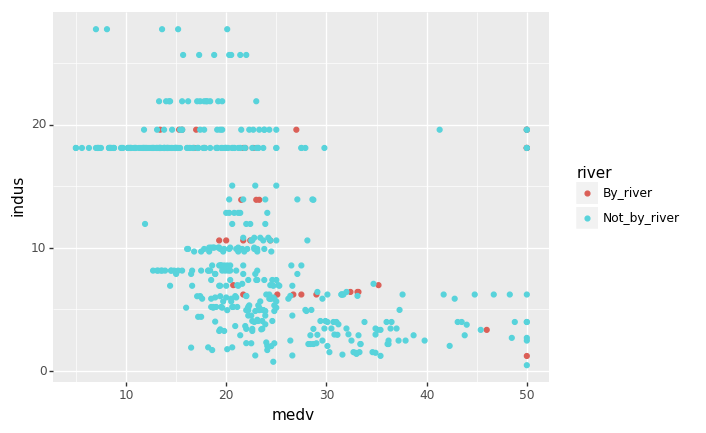

<ggplot: (8770327597241)>

In [17]:
(p9.ggplot(data=df_clean, 
           mapping=p9.aes(x='medv', 
                          y='indus',
                          color='river')) 
 + p9.geom_point()
)

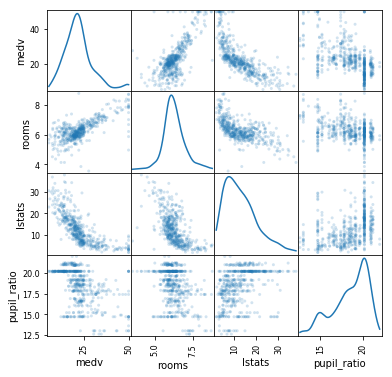

In [20]:
pd.plotting.scatter_matrix(df_clean[['medv', 'rooms','lstats', 'pupil_ratio']], alpha=0.2, figsize=(6, 6), diagonal='kde');

In [ ]:
# I take the asbolute to spot better the features correlated with medv
# Im gonna focus on lstats & rooms for now, although there is some correlation (0.61)

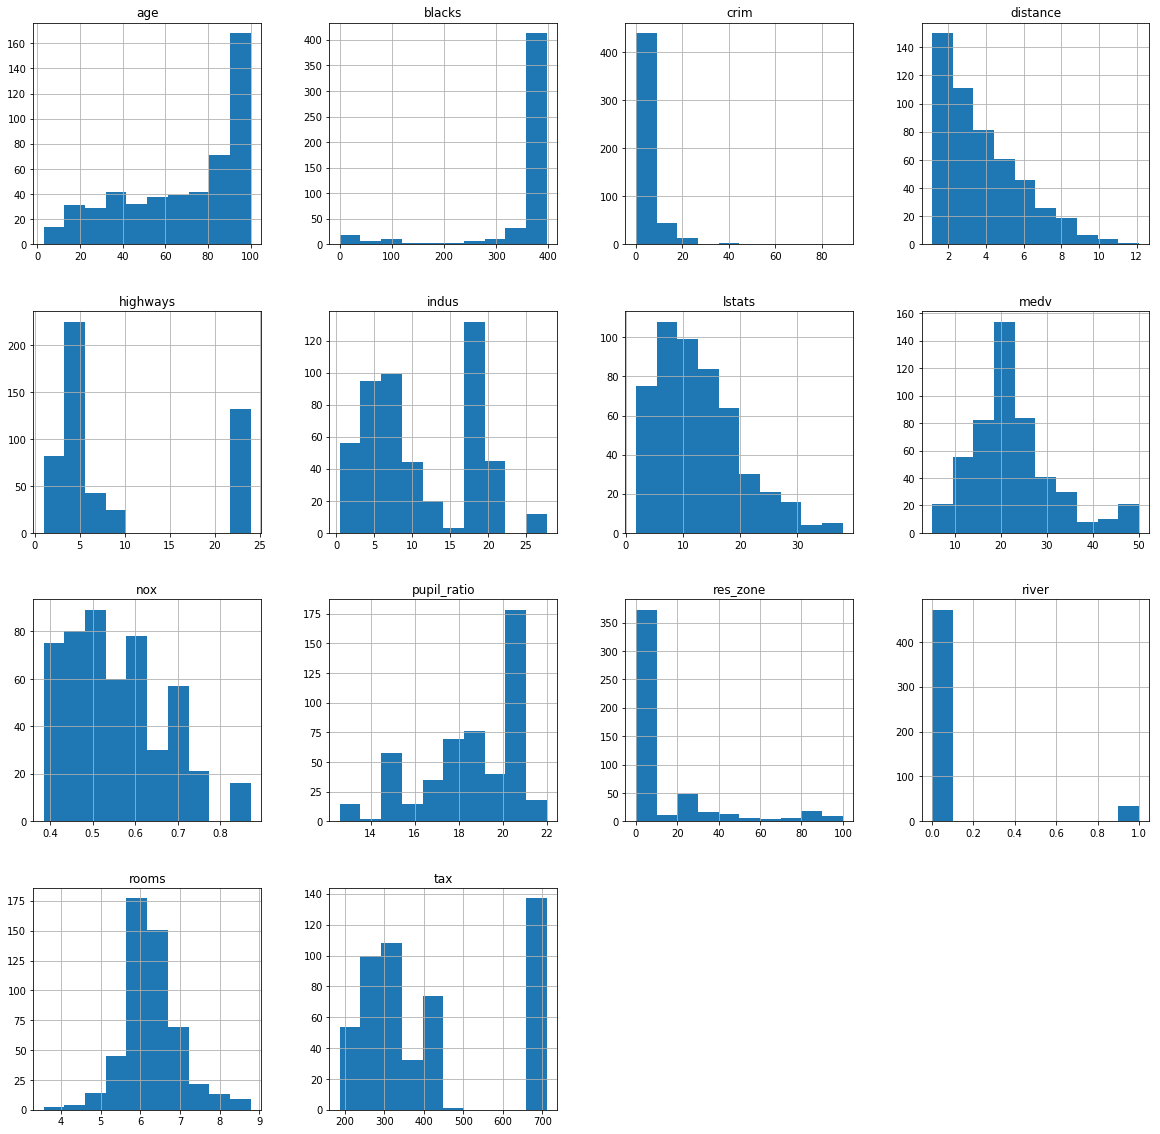

In [74]:
df_clean.hist();

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
import numpy as np

In [73]:
X = df_clean[['rooms', 'lstats', 'pupil_ratio']].values
Y = df_clean['medv'].values

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3,
                                                    random_state = 10)

In [75]:
lr = LinearRegression()

In [76]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [77]:
y_pred = lr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_pred)))
r2 = r2_score(y_train, y_pred)

In [78]:
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 5.045377828427697
R2 score is 0.6723652501006935




In [79]:
y_pred = lr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

In [80]:
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 5.600854721017862
R2 score is 0.678700610420599


In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
dft = DecisionTreeRegressor()

In [70]:
dft.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [71]:
y_train_pred = dft.predict(X_train, y_pred)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [72]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

NameError: name 'vs' is not defined

In [88]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

# user variables to tune
seed=42
folds   = 10
metric  = "neg_mean_squared_error"

# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
#models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["ExtraTrees"]    = ExtraTreesRegressor()

# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed)
    results = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=metric)
    
    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))


Linear: -26.693, 11.112
Lasso: -29.71, 10.703
ElasticNet: -29.251, 10.608
KNN: -20.077, 8.777
DecisionTree: -23.631, 10.271
AdaBoost: -22.819, 10.119
GradientBoost: -15.953, 10.164


/home/julien/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/julien/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/julien/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/julien/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/julien/anaconda3/lib/python3.7/site-pa

RandomForest: -17.223, 9.353
ExtraTrees: -16.562, 9.367


In [90]:

# box-whisker plot to compare regression models
figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)
#plt.savefig("model_mse_scores.png")
plt.clf()
plt.show()

<Figure size 432x288 with 0 Axes>

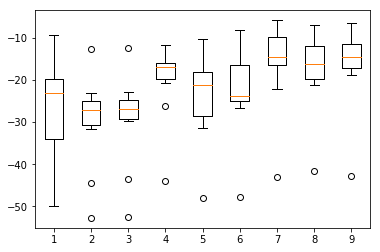

In [96]:
plt.boxplot(model_results);
    